In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [47]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')


In [5]:
df.shape

(42000, 785)

In [48]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
37513,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import matplotlib.pyplot as plt

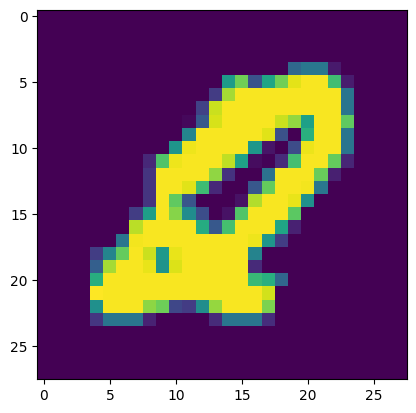

In [12]:
plt.imshow(df.iloc[13052,1:].values.reshape(28,28))

In [49]:
x= df.iloc[:,1:]
y=df.iloc[:,0]

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [16]:
x_train.shape

(33600, 784)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

sklearn.neighbors._classification.KNeighborsClassifier

In [52]:
knn= KNeighborsClassifier()

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [64]:
y_pred=knn.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6783333333333333

In [55]:
##Standerdising the data.

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [56]:
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)


In [57]:
###Appliying PCA and then checking accuracy.
from sklearn.decomposition import PCA
pca=PCA(n_components=200)


In [58]:
x_train= pca.fit_transform(x_train)
x_test= pca.fit_transform(x_test)

In [59]:
x_train.shape

(33600, 200)

In [60]:
knn= KNeighborsClassifier()

In [61]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
y_pred=knn.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6670238095238096